In [195]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [196]:
df = pd.read_csv('loan_train.csv', delimiter=",")
df["education"].value_counts()
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [197]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

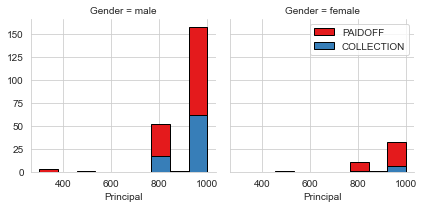

In [198]:

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

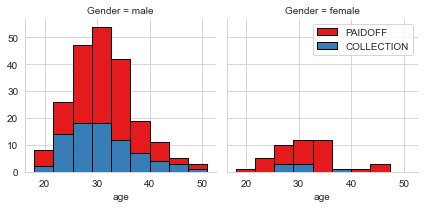

In [199]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

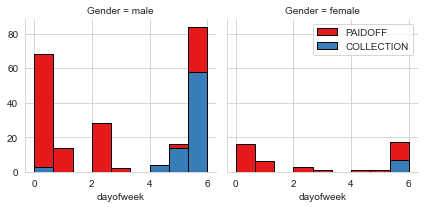

In [7]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [8]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['weekend'].value_counts()
df['weekend']

0      0
1      0
2      0
3      1
4      1
      ..
341    1
342    1
343    0
344    0
345    0
Name: weekend, Length: 346, dtype: int64

In [9]:
# Convert Categorical features to numerical values
# Let's look at gender:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [10]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [11]:
# df[['Principal','terms','age','Gender','education']].head()
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [12]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [13]:
# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [14]:
# Feature Selection
# Let's define feature sets, X:
X = Feature
X.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [15]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [16]:
# Lets define our target values
y = df['loan_status'].values
# lets transform values of PAIDOFF and COLLECTION into 1 and 0 respectiely
from sklearn.preprocessing import LabelEncoder
loan_status = LabelEncoder().fit(['PAIDOFF',"COLLECTION"])
y = loan_status.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [144]:
# Read data from our loan data for testing
test_df = pd.read_csv('loan_test.csv', delimiter=",")
test_df["education"].value_counts()
test_df.head()
# Look at the shape of our data
test_df.shape

(54, 10)

In [145]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [146]:
# Look  at the loan status value count
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [147]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

In [148]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['weekend'].value_counts()
test_df['weekend']

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    0
Name: weekend, dtype: int64

In [149]:
# Convert Categorical features to numerical values
# Let's look at gender:
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [150]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [151]:
# df[['Principal','terms','age','Gender','education']].head()
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [152]:
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [153]:
# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feat Data Frame
Feat = test_df[['Principal','terms','age','Gender','weekend']]
Feat = pd.concat([Feat,pd.get_dummies(test_df['education'])], axis=1)
Feat.drop(['Master or Above'], axis = 1,inplace=True)

In [154]:
# Feature Selection
# Let's define feature sets, X:
X_prime = Feat

In [155]:
# Normalising our data using standard scaler
X_prime= preprocessing.StandardScaler().fit(X_prime).transform(X_prime)
X_prime[0:5]
len(X_prime)
X_prime.shape

(54, 8)

In [156]:
# Lets define our target values
y_prime = test_df['loan_status'].values
# lets transform values of PAIDOFF and COLLECTION into 1 and 0 respectiely
from sklearn.preprocessing import LabelEncoder
loan_status = LabelEncoder().fit(['PAIDOFF',"COLLECTION"])
y_prime = loan_status.fit_transform(y_prime)
y_prime.shape

(54,)

In [100]:
###############################CLASSIFICATION K_NEAREST NEIGBOUR###################
# We need to classify if the applicants will default on a loan or not, so we shall take values for
# paidoff or not paid off from our initial data source df
# we need to know the shapes of X and y to see if they match
print(y.shape,X.shape)

(346,) (346, 8)


In [157]:
# We need to divide our data into training data and test data, we shall use 80% for training and the 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# we need to know if the columns for training set and testing set match
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(276, 8) (276,)
(70, 8) (70,)


In [158]:
# we can now import our K_nearest neigbour algorithm
from sklearn.neighbors import KNeighborsClassifier
# We shall call our model Neighbour
k = 7
Neigbour = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
# sampling out our model
t = Neigbour.predict(X_train[0:10])
print(y_train[0:10])
print(t)

[1 0 1 1 1 1 0 0 0 1]
[1 0 1 1 1 1 0 1 0 1]


In [159]:
# ACCURACY PREDICTION
from sklearn import metrics
print(f"train accyracy is {metrics.accuracy_score(Neigbour.predict(X_train), y_train)}")
print(f"test accyracy is {metrics.accuracy_score(Neigbour.predict(X_test), y_test)}")

train accyracy is 0.8079710144927537
test accyracy is 0.7857142857142857


In [167]:
# we need to find the value of k for which we have maximum accuracy
# let us set the k = 20
K = 10

accuracy_values = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    accuracy_values[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


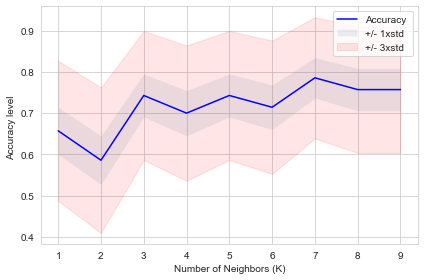

In [168]:
# we are going to plot our accuaracy values and k values
plt.plot(range(1,K),accuracy_values,'b')
plt.fill_between(range(1,K),accuracy_values - 1 * std_acc,accuracy_values + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),accuracy_values - 3 * std_acc,accuracy_values + 3 * std_acc, alpha=0.10,color="red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy level ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [169]:
print(f"The best accuracy is {np.max(accuracy_values)} with neighbours = 7")

The best accuracy is 0.7857142857142857 with neighbours = 7


In [172]:
# getting the value of f1_score and jaccard_score using data from our test data set
from sklearn.metrics import f1_score, jaccard_score
# printing the values of f1_score and jaccard_score
print(f" f1 score:{f1_score(y_prime, neigh.predict(X_prime), pos_label=1)}")
print(f"jaccar_score :{jaccard_score(y_prime, neigh.predict(X_prime), pos_label=1)}")

 f1 score:0.823529411764706
jaccar_score :0.7


In [173]:
############DECISION TREE EXERCISE###########

# splitting our data set into train set and test set, 80% of samples for train_set
from sklearn.model_selection import train_test_split
X_traind, X_testd, y_traind, y_testd = train_test_split(X, y, test_size=0.2, random_state=4)
# we need to know if the columns for training set and testing set match
print(X_traind.shape, y_traind.shape)
print(X_testd.shape, y_testd.shape)


(276, 8) (276,)
(70, 8) (70,)


In [174]:
# Building out decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree_= DecisionTreeClassifier(criterion="entropy", max_depth=4)
tree_.fit(X_traind,y_traind)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [128]:
from sklearn import metrics
print(metrics.accuracy_score(tree_.predict(X_traind),y_traind))
print(metrics.accuracy_score(tree_.predict(X_testd),y_testd))

0.7463768115942029
0.6142857142857143


In [178]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
# JACCARD SCORE
print(f" Train set accuaracy is {metrics.accuracy_score(tree_.predict(X_traind), y_traind)}")
print(f" Test set accuracy is {metrics.accuracy_score(tree_.predict(X_testd), y_testd)}")
c = jaccard_score(y_prime, tree_.predict(X_prime), pos_label=1)
print(f"Jaccard_score is { c } for decision tree")

 Train set accuaracy is 0.7463768115942029
 Test set accuracy is 0.6142857142857143
Jaccard_score is 0.6590909090909091 for decision tree


In [180]:
# Getting f1_score
from sklearn.metrics import f1_score
r = f1_score(tree_.predict(X_prime), y_prime, pos_label=1)
print(f"f1 score for decision tree is {r}")

f1 score for decision tree is 0.7945205479452054


In [181]:
#########SUPPORT VECTOR MACHINE PROJECT CODE#########
#splitting our data, 80% for train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
# Getting the shapes of our data sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(276, 8) (276,)
(70, 8) (70,)


In [182]:
# We are building our svm model using rbf
from sklearn import svm
status  = svm.SVC(kernel='rbf')
status.fit(X_train, y_train)

SVC()

In [183]:
# sampling our model
yhat = status.predict(X_prime)
print(y_test[0:5])
yhat[0:5]

[1 1 1 1 1]


array([1, 1, 1, 1, 0])

In [185]:
from sklearn.metrics import jaccard_score
print(f" jaccard score for SVM IS:{jaccard_score(y_prime, yhat,pos_label=1)}")

 jaccard score for SVM IS:0.78


In [186]:
# getting jaccard score using our data
from sklearn.metrics import f1_score
rs = f1_score(y_prime, yhat, average='weighted')
print(f"The f1 score for SVM IS : {rs}")

The f1 score for SVM IS : 0.7583503077293734


In [187]:
# ########LOGISTIC REGRESSION#############################################
# splitting our data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [188]:
# Building the model for logistic regreesion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [189]:
# sampling our model
yhat = LR.predict(X_prime)

In [190]:
# obtaining the jaccard_score
from sklearn.metrics import jaccard_score
rl = jaccard_score(y_prime, yhat,pos_label=1)
print(f" The jaccard score for logistic regreesion is :{rl}")

 The jaccard score for logistic regreesion is :0.7358490566037735


In [191]:
from sklearn.metrics import log_loss
y_hat = LR.predict(X_prime)
# log_loss(y_test, LR.predict(X_test))
y_prob = LR.predict_proba(X_prime)
y_prob


array([[0.24523466, 0.75476534],
       [0.40836323, 0.59163677],
       [0.428088  , 0.571912  ],
       [0.50550113, 0.49449887],
       [0.45560894, 0.54439106],
       [0.45319477, 0.54680523],
       [0.48466512, 0.51533488],
       [0.48408899, 0.51591101],
       [0.42592106, 0.57407894],
       [0.45152793, 0.54847207],
       [0.48126523, 0.51873477],
       [0.40763322, 0.59236678],
       [0.48664718, 0.51335282],
       [0.43638749, 0.56361251],
       [0.44319457, 0.55680543],
       [0.48758117, 0.51241883],
       [0.42033096, 0.57966904],
       [0.40417894, 0.59582106],
       [0.4864502 , 0.5135498 ],
       [0.46497685, 0.53502315],
       [0.49525993, 0.50474007],
       [0.47007599, 0.52992401],
       [0.24932566, 0.75067434],
       [0.30500857, 0.69499143],
       [0.30638884, 0.69361116],
       [0.3206654 , 0.6793346 ],
       [0.30748866, 0.69251134],
       [0.29032237, 0.70967763],
       [0.31326476, 0.68673524],
       [0.32745634, 0.67254366],
       [0.

In [192]:
# obtaining log loss
from sklearn.metrics import log_loss
rx = log_loss(y_prime, y_prob)
print(f" The log loss for logistic regreesion is {rx}")

 The log loss for logistic regreesion is 0.5672153379912981


In [194]:
# obtaing f1 score
from sklearn.metrics import f1_score
k = LR.predict(X_prime)
kp = f1_score(k,y_prime,  pos_label=1)
print(f"f1 score for logistic regreesion is {kp}")

f1 score for logistic regreesion is 0.8478260869565216
